In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
%matplotlib widget
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

from public_tests import *

from autils import *
from lab_utils_softmax import plt_softmax
np.set_printoptions(precision=2)

Metal device set to: Apple M1


2022-10-15 16:39:37.919670: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-15 16:39:37.919891: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


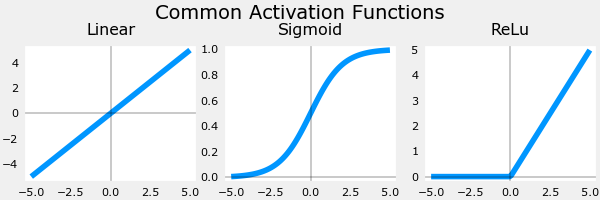

In [4]:
plt_act_trio()

In [5]:
def my_softmax(z):
    ez = np.exp(z)
    return ez/np.sum(ez)

In [6]:
z = np.array([1., 2., 3., 4.])
a = my_softmax(z)
atf = tf.nn.softmax(z)
print(f"my_softmax(z):         {a}")
print(f"tensorflow softmax(z): {atf}")

# BEGIN UNIT TEST  
test_my_softmax(my_softmax)
# END UNIT TEST  

my_softmax(z):         [0.03 0.09 0.24 0.64]
tensorflow softmax(z): [0.03 0.09 0.24 0.64]
 All tests passed.


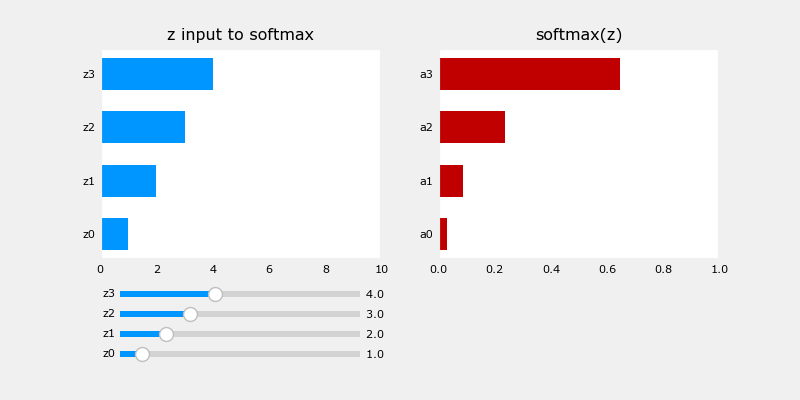

In [7]:
plt.close("all")
plt_softmax(my_softmax)

In [8]:
X, y = load_data()

In [10]:
#print ('The first element of X is: ', X[0])

In [11]:
print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])

The first element of y is:  0
The last element of y is:  9


In [13]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (5000, 400)
The shape of y is: (5000, 1)


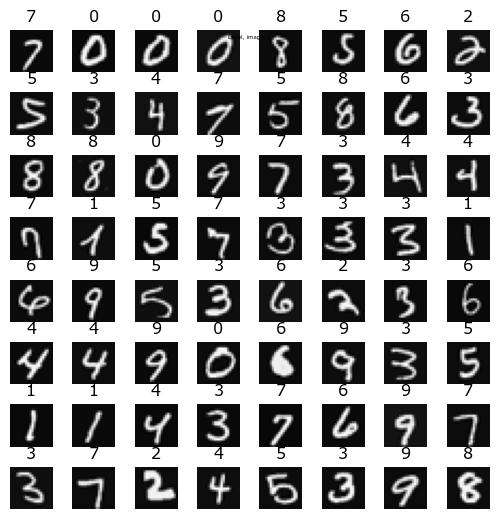

In [18]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(5,5))
fig.tight_layout(pad=0.1)
for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    X_random_shaped = X[random_index].reshape((20,20)).T
    ax.imshow(X_random_shaped, cmap='gray')
    
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=4)

In [19]:
tf.random.set_seed(1234)
model = Sequential(
    [
        tf.keras.layers.InputLayer((400,)),
        tf.keras.layers.Dense(25, activation="relu", name="L1"),
        tf.keras.layers.Dense(15, activation="relu", name="L2"),
        tf.keras.layers.Dense(10, activation="linear", name="L3")
    ], name = "my_model"
)

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

In [20]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                10025     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 10,575
Trainable params: 10,575
Non-trainable params: 0
_________________________________________________________________


In [21]:
test_model(model, 10, 400)

All tests passed!


In [22]:
[layer1, layer2, layer3] = model.layers

In [23]:
W1, b1 = layer1.get_weights()
W2, b2 = layer2.get_weights()
W3, b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [24]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
        X, y,
        epochs=40
)

Epoch 1/40


2022-10-15 18:02:45.378979: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-15 18:02:45.513256: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


157/157 [==============================] - 2s 5ms/step - loss: 1.4885
Epoch 2/40
157/157 [==============================] - 1s 4ms/step - loss: 0.6281
Epoch 3/40
157/157 [==============================] - 1s 4ms/step - loss: 0.4396
Epoch 4/40
157/157 [==============================] - 1s 4ms/step - loss: 0.3489
Epoch 5/40
157/157 [==============================] - 1s 4ms/step - loss: 0.2998
Epoch 6/40
157/157 [==============================] - 1s 4ms/step - loss: 0.2676
Epoch 7/40
157/157 [==============================] - 1s 4ms/step - loss: 0.2435
Epoch 8/40
157/157 [==============================] - 1s 4ms/step - loss: 0.2224
Epoch 9/40
157/157 [==============================] - 1s 4ms/step - loss: 0.2105
Epoch 10/40
157/157 [==============================] - 1s 4ms/step - loss: 0.1897
Epoch 11/40
157/157 [==============================] - 1s 4ms/step - loss: 0.1804
Epoch 12/40
157/157 [==============================] - 1s 4ms/step - loss: 0.1705
Epoch 13/40
157/157 [===============

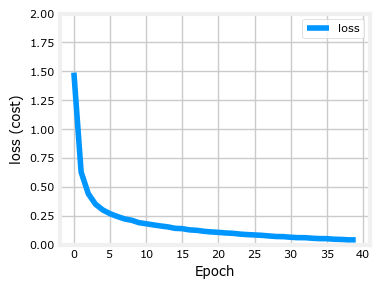

In [25]:
plot_loss_tf(history)

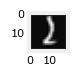

1/1 [==============================] - 0s 217ms/step
 predicting a Two: [[-11.63   3.53   8.42   2.25 -14.3   -4.44  -4.97   1.42  -4.91  -6.25]]
 Largest Prediction index: 2


2022-10-15 18:06:40.092112: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [26]:
image_of_two = X[1015]
display_digit(image_of_two)

prediction = model.predict(image_of_two.reshape(1,400))

print(f" predicting a Two: {prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

In [27]:
prediction_p = tf.nn.softmax(prediction)

print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

 predicting a Two. Probability vector: 
[[1.94e-09 7.45e-03 9.90e-01 2.08e-03 1.35e-10 2.56e-06 1.51e-06 9.04e-04
  1.60e-06 4.22e-07]]
Total of predictions: 1.000


In [28]:
print(np.argmax(prediction_p))

2


1/1 [==============================] - 0s 10ms/step


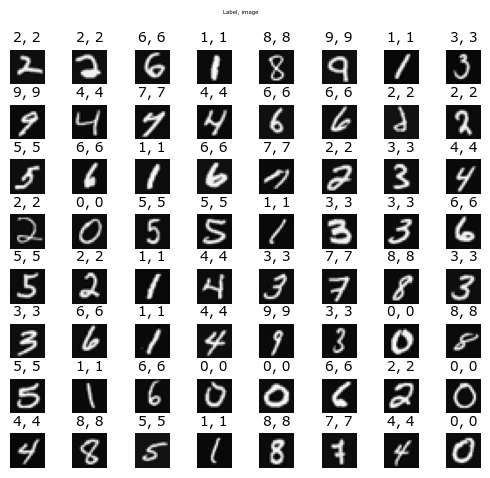

In [31]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(5,5))
fig.tight_layout(pad=0.13, rect=[0,0.03,1,0.91])
widgvis(fig)

for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    X_random_shaped = X[random_index].reshape((20,20)).T
    ax.imshow(X_random_shaped, cmap='gray')
    
    
    prediction = model.predict(X[random_index].reshape(1, 400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    ax.set_title(f"{y[random_index,0]}, {yhat}", fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, image", fontsize=4)
plt.show()

1/1 [==============================] - 0s 10ms/step
34 errors out of 5000 images


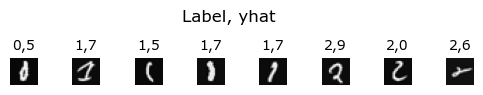

In [32]:
print( f"{display_errors(model,X,y)} errors out of {len(X)} images")